<a href="https://colab.research.google.com/github/Santigs/eosdac-client/blob/master/SerratDataTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Explicacions</h1>

Hem "netejat" les dades eliminant columnes, classificant les columnes d'habitació, plataforma i posició del mes, creant la columna kids i pets indicant amb un 1 que porten mascota o nens/nado i amb un 0 si no en porten.
Hem creat la columna beuen amb un 1 si han consumit beguda i la columna incrementen si han incrementat per un valor >0,25

Triem les seguents columnes de la matriu X: habitació, quantitat de membres del grup, si porten nen/nado i si porten mascota

La columna y escollim si incrementen.

Separem les dades en un 75% per entrenar i un 25% per testejar

Estudiem els models de Classificació per regressio logística i el de K-Nearest Neighbours. El primer ens dona un valor d'estimació de 0,63 i el segon de 0,68 amb un valor de K=5

Testejem el segon model amb valor de K desde 1 fins a 25 i dibuixem un gràfic per veure que el millor resultat es dona amb un valor de K=6

Tornem a estudiar el model KNN ara amb totes les dades (no sols les de entrenament) i estudiem que ens indica el model per una reserva feta a l'habitació 3 (Alegria) per dues persones sense nadó i amb mascota. 

El model ens indica que incrementaran més d'un 25% amb una probabilitat del 73,6%




In [0]:
# conventional way to import pandas
import pandas as pd

In [4]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('C2H2SV.csv', index_col=0)

# display the first 5 rows
data.head()

,plat,date,dia_set,pos_mes,days,hab,qty,kids,pets,reserva,sopars,dinars,esmort,begudes,mascotes,nado,impots,altres,subtot,total,increment,beuen,incrementen
1,1,43467,4,1,1,2,2,1,1,102,0,0,24,0,10,0,0,0,34,136,"0,25",0,0
2,1,43468,5,1,1,2,2,0,0,"64,32",40,0,24,0,0,0,0,"12,5","76,5","140,82","0,5432466979",0,1
3,1,43470,7,1,2,2,2,0,1,"128,64",16,0,40,0,20,0,0,0,76,"204,64","0,3713838937",0,1
4,2,43472,2,1,1,1,2,0,0,"75,17",0,0,0,0,0,0,0,0,0,"75,17",0,0,0
5,1,43472,2,1,2,1,2,0,1,"128,84",28,0,48,0,20,0,0,107,203,"331,84","0,6117405979",0,1


In [5]:
data.pop('date')

1     43467
2     43468
3     43470
4     43472
5     43472
      ...  
72    43556
73    43557
74    43558
75    43558
76    43559
Name: date, Length: 76, dtype: int64

In [7]:
data

,plat,dia_set,pos_mes,days,hab,qty,kids,pets,reserva,sopars,dinars,esmort,begudes,mascotes,nado,impots,altres,subtot,total,increment,beuen,incrementen
1,1,4,1,1,2,2,1,1,102,0,0,24,0,10,0,0,0,34,136,"0,25",0,0
2,1,5,1,1,2,2,0,0,"64,32",40,0,24,0,0,0,0,"12,5","76,5","140,82","0,5432466979",0,1
3,1,7,1,2,2,2,0,1,"128,64",16,0,40,0,20,0,0,0,76,"204,64","0,3713838937",0,1
4,2,2,1,1,1,2,0,0,"75,17",0,0,0,0,0,0,0,0,0,"75,17",0,0,0
5,1,2,1,2,1,2,0,1,"128,84",28,0,48,0,20,0,0,107,203,"331,84","0,6117405979",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,2,1,2,2,2,0,0,"102,51",0,0,0,0,0,0,2,0,2,"104,51","0,0191369247",0,0
73,4,3,1,2,4,2,0,0,125,38,0,0,7,0,0,2,0,47,172,"0,273255814",1,1
74,1,4,1,3,2,2,0,0,"204,47",22,0,0,0,0,0,3,0,25,"229,47","0,1089467033",0,0
75,1,4,1,2,2,2,0,0,"112,69",16,0,0,"17,6",0,0,2,0,"35,6","148,29","0,2400701328",1,0


In [0]:
y = data.incrementen

In [0]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

In [10]:
y

1     0
2     1
3     1
4     0
5     1
     ..
72    0
73    1
74    0
75    0
76    1
Name: incrementen, Length: 76, dtype: int64

In [0]:
X = data[['hab','qty','kids','pets']]

In [12]:
X

,hab,qty,kids,pets
1,2,2,1,1
2,2,2,0,0
3,2,2,0,1
4,1,2,0,0
5,1,2,0,1
...,...,...,...,...
72,2,2,0,0
73,4,2,0,0
74,2,2,0,0
75,2,2,0,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(57, 4)
(57,)
(19, 4)
(19,)


In [0]:
# import model
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression()

#fit
logreg.fit(X_train, y_train)



In [17]:
# make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.42105263157894735


In [18]:
# knn 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6842105263157895


In [0]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

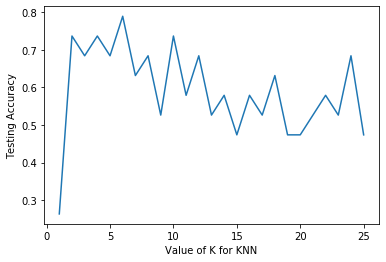

In [20]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [21]:
# veiem que el que dona millor resultat es el K=6

# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=6)
# train the model with X and y (not X_train and y_train)
knn.fit(X, y)
# mesurem el rendiment
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7368421052631579


In [22]:


# make a prediction for an out-of-sample observation
knn.predict([[3, 2, 0, 1]])

array([1])